In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import io
import os

In [5]:
FOLDER = r'/Users/guydavidson/projects/nivlab/multitasking-modeling/multitasking-results'

MATLAB_OUTPUT = r'/Users/guydavidson/Dropbox/Multitasking Experiment V2/Guy/outputs/outputs-3-dims-4-feats-500-iters-21-Jul-2018.mat'
PYTHON_SINGLE_LAYER_OUTPUT = os.path.join(FOLDER, 'single-layer-model-outputs.mat')
PYTHON_SINGLE_LAYER_MATLAB_PATTERNS_OUTPUT = os.path.join(FOLDER, 'single-model-matlab-patterns-outputs.mat')
PYTHON_MULTI_LAYER_OUTPUT = os.path.join(FOLDER, 'single-model-outputs.mat')
PYTORCH_SINGLE_LAYER_MATLAB_PATTERNS_OUTPUT = os.path.join(FOLDER, 'single-layer-pytorch-matlab-patterns-no-shuffle.mat')
PYTORCH_SINGLE_LAYER_MATLAB_PATTERNS_OUTPUT_2 = os.path.join(FOLDER, 'single-layer-pytorch-matlab-patterns-no-shuffle-2.mat')
PYTORCH_MULTI_LAYER_MATLAB_PATTERNS_OUTPUT = os.path.join(FOLDER, 'pytorch-matlab-patterns-no-shuffle.mat')

In [6]:
python_output = io.loadmat(PYTHON_SINGLE_LAYER_MATLAB_PATTERNS_OUTPUT)
pytorch_output = io.loadmat(PYTORCH_SINGLE_LAYER_MATLAB_PATTERNS_OUTPUT)
pytorch_output_2 = io.loadmat(PYTORCH_SINGLE_LAYER_MATLAB_PATTERNS_OUTPUT_2)
pytorch_multilayer_output = io.loadmat(PYTORCH_MULTI_LAYER_MATLAB_PATTERNS_OUTPUT)
matlab_output = io.loadmat(MATLAB_OUTPUT)

In [7]:
print(matlab_output['mse'].shape)
print(python_output['mse'].shape)
print(pytorch_output['mse'].shape)
# print(python_multi_output['mse'].shape)

x_max = min([out['mse'].shape[1] for out in (matlab_output, python_output, pytorch_output)]) #, python_multi_output)])

(1, 500)
(1, 336)
(1, 500)


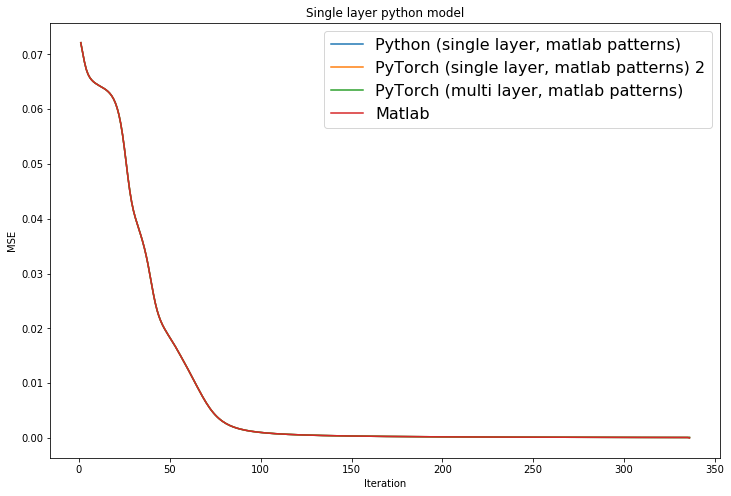

In [8]:
FIGURE_SIZE = (12, 8)
plt.figure(figsize=FIGURE_SIZE)

x = np.arange(1, x_max + 1, 1)
plt.plot(x, np.squeeze(python_output['mse'][:, :x_max]), label='Python (single layer, matlab patterns)')
# plt.plot(x, np.squeeze(pytorch_output['mse'][:, :x_max]), label='PyTorch (single layer, matlab patterns)')
plt.plot(x, np.squeeze(pytorch_output_2['mse'][:, :x_max]), label='PyTorch (single layer, matlab patterns) 2')
plt.plot(x, np.squeeze(pytorch_multilayer_output['mse'][:, :x_max]), label='PyTorch (multi layer, matlab patterns)')
# plt.plot(x, np.squeeze(python_multi_output['mse'][:, :x_max]), label='Python (split layers)')
plt.plot(x, np.squeeze(matlab_output['mse'][:, :x_max]), label='Matlab')

plt.legend(loc=1, fontsize=16)
plt.title('Single layer python model')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

In [15]:
RANDOM_ORDER_MATLAB_OUTPUT = r'/Users/guydavidson/Dropbox/Multitasking Experiment V2/Guy/outputs/outputs-3-dims-4-feats-500-iters-24-Jul-2018.mat'
RANDOM_ORDER_PYTHON_SINGLE_LAYER_OUTPUT = r'/Users/guydavidson/projects/nivlab/multitasking-modeling/multitasking-results/single-model-random-order-outputs.mat'

In [16]:
random_order_python_output = io.loadmat(RANDOM_ORDER_PYTHON_SINGLE_LAYER_OUTPUT)
random_order_matlab_output = io.loadmat(RANDOM_ORDER_MATLAB_OUTPUT)

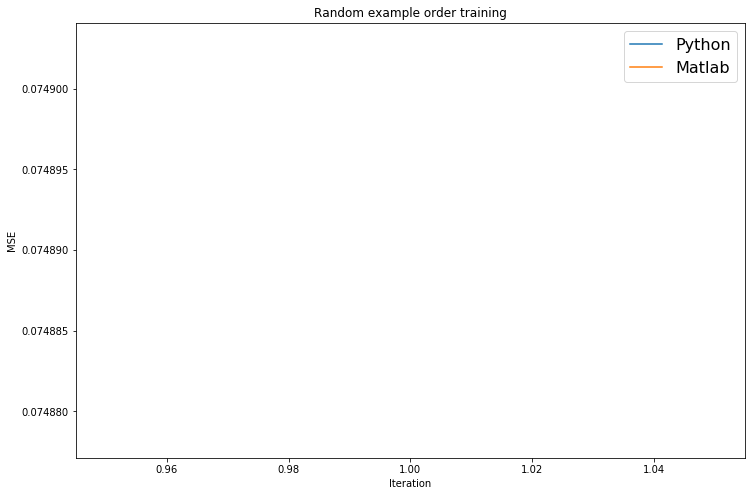

In [17]:
FIGURE_SIZE = (12, 8)
plt.figure(figsize=FIGURE_SIZE)

x_max = min([out['mse'].shape[1] for out in (random_order_python_output, random_order_matlab_output)]) #, python_multi_output)])
x = np.arange(1, x_max + 1, 1)
plt.plot(x, np.squeeze(random_order_python_output['mse'][:, :x_max]), label='Python')
# plt.plot(x, np.squeeze(python_multi_output['mse'][:, :x_max]), label='Python (split layers)')
plt.plot(x, np.squeeze(random_order_matlab_output['mse'][:, :x_max]), label='Matlab')

plt.legend(loc=1, fontsize=16)
plt.title('Random example order training')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

In [21]:
SHAPE_NAMING_NO_FAST_OUTPUT = r'/Users/guydavidson/projects/nivlab/multitasking-modeling/shape-naming-results/shape-naming-no-fast-path.mat'
SHAPE_NAMING_ADJ_BIAS_OUTPUT = r'/Users/guydavidson/projects/nivlab/multitasking-modeling/shape-naming-results/shape-naming-no-fast-path-adj-bias.mat'

shape_naming_no_fast_python_output = io.loadmat(SHAPE_NAMING_NO_FAST_OUTPUT)
shape_naming_adj_bias_python_output = io.loadmat(SHAPE_NAMING_ADJ_BIAS_OUTPUT)

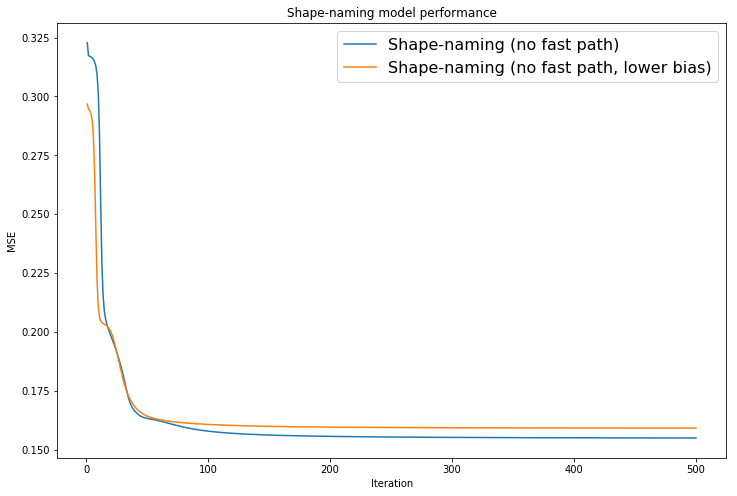

In [22]:
FIGURE_SIZE = (12, 8)
plt.figure(figsize=FIGURE_SIZE)

x_max = min([out['mse'].shape[1] for out in 
             (shape_naming_no_fast_python_output, shape_naming_adj_bias_python_output)]) #, python_multi_output)])x = np.arange(1, x_max + 1, 1)
x = np.arange(1, x_max + 1, 1)
plt.plot(x, np.squeeze(shape_naming_no_fast_python_output['mse'][:, :x_max]), 
         label='Shape-naming (no fast path)')
plt.plot(x, np.squeeze(shape_naming_adj_bias_python_output['mse'][:, :x_max]), 
         label='Shape-naming (no fast path, lower bias)')

plt.legend(loc=1, fontsize=16)
plt.title('Shape-naming model performance')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

In [23]:
SHAPE_NAMING_FOLDER = r'/Users/guydavidson/projects/nivlab/multitasking-modeling/shape-naming-results'

shape_naming_hidden_size_results = [io.loadmat(os.path.join(SHAPE_NAMING_FOLDER,
                                                           'shape-naming-no-fast-adj-bias-{i}-hidden-units.mat'.format(i=i)))
                                    for i in range(2, 6)]




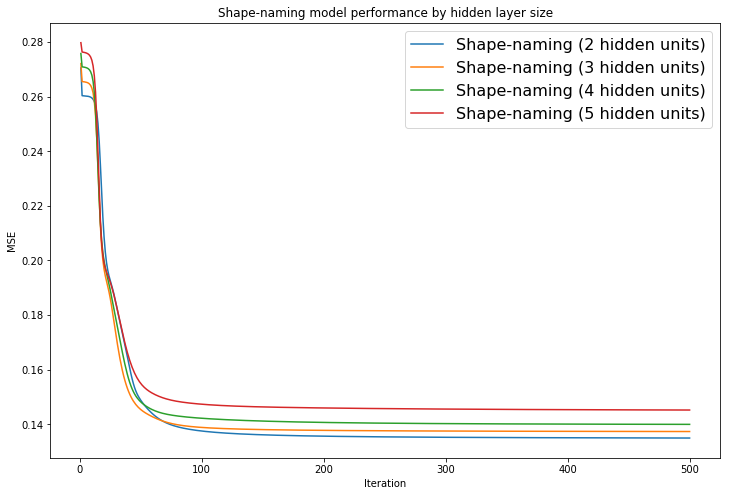

In [24]:
FIGURE_SIZE = (12, 8)
plt.figure(figsize=FIGURE_SIZE)

x_max = min([out['mse'].shape[1] for out in 
             shape_naming_hidden_size_results])
x = np.arange(1, x_max + 1, 1)

for i, out in zip(range(2, 6), shape_naming_hidden_size_results):
    plt.plot(x, np.squeeze(out['mse'][:, :x_max]), 
         label='Shape-naming ({i} hidden units)'.format(i=i))

plt.legend(loc=1, fontsize=16)
plt.title('Shape-naming model performance by hidden layer size')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

In [25]:
SHAPE_NAMING_FOLDER = r'/Users/guydavidson/projects/nivlab/multitasking-modeling/shape-naming-results'

shape_naming_learning_rate_results = [io.loadmat(os.path.join(SHAPE_NAMING_FOLDER,
                                                           'shape-naming-no-fast-adj-bias-2-hidden-units-lr-0.{i}.mat'.format(i=i)))
                                    for i in range(1, 8)]




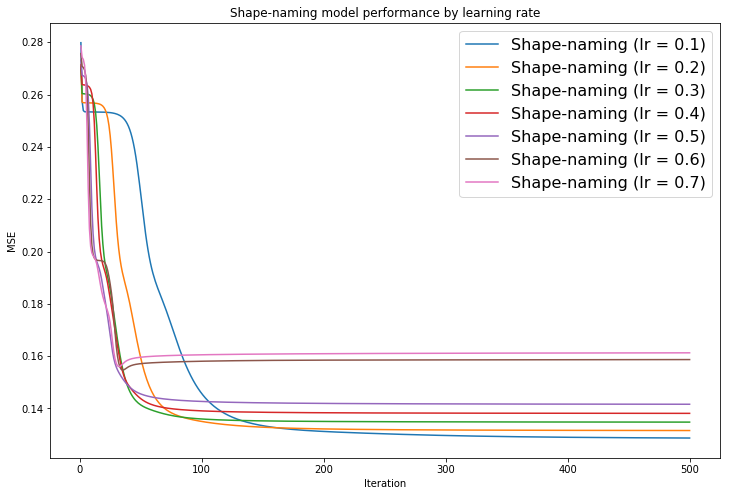

In [26]:
FIGURE_SIZE = (12, 8)
plt.figure(figsize=FIGURE_SIZE)

x_max = min([out['mse'].shape[1] for out in 
             shape_naming_hidden_size_results])
x = np.arange(1, x_max + 1, 1)

for i, out in zip(range(1, 8), shape_naming_learning_rate_results):
    plt.plot(x, np.squeeze(out['mse'][:, :x_max]), 
         label='Shape-naming (lr = 0.{i})'.format(i=i))

plt.legend(loc=1, fontsize=16)
plt.title('Shape-naming model performance by learning rate')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

In [ ]:
import psyneulink as pnl
import single_layer_multitasking_model

In [ ]:
slmm = single_layer_multitasking_model.SingleLayerMultitaskingModel(3, 4)

In [32]:
import shape_naming_model
import psyneulink as pnl

In [28]:
model = shape_naming_model.ShapeNamingModel(2, fast_path=False, hidden_layer_size=2,  bias=-1)

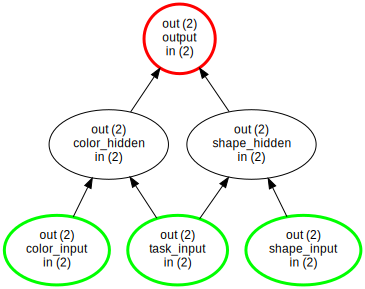

In [34]:
model.system.show_graph(show_dimensions=pnl.ALL, output_fmt = 'jupyter')

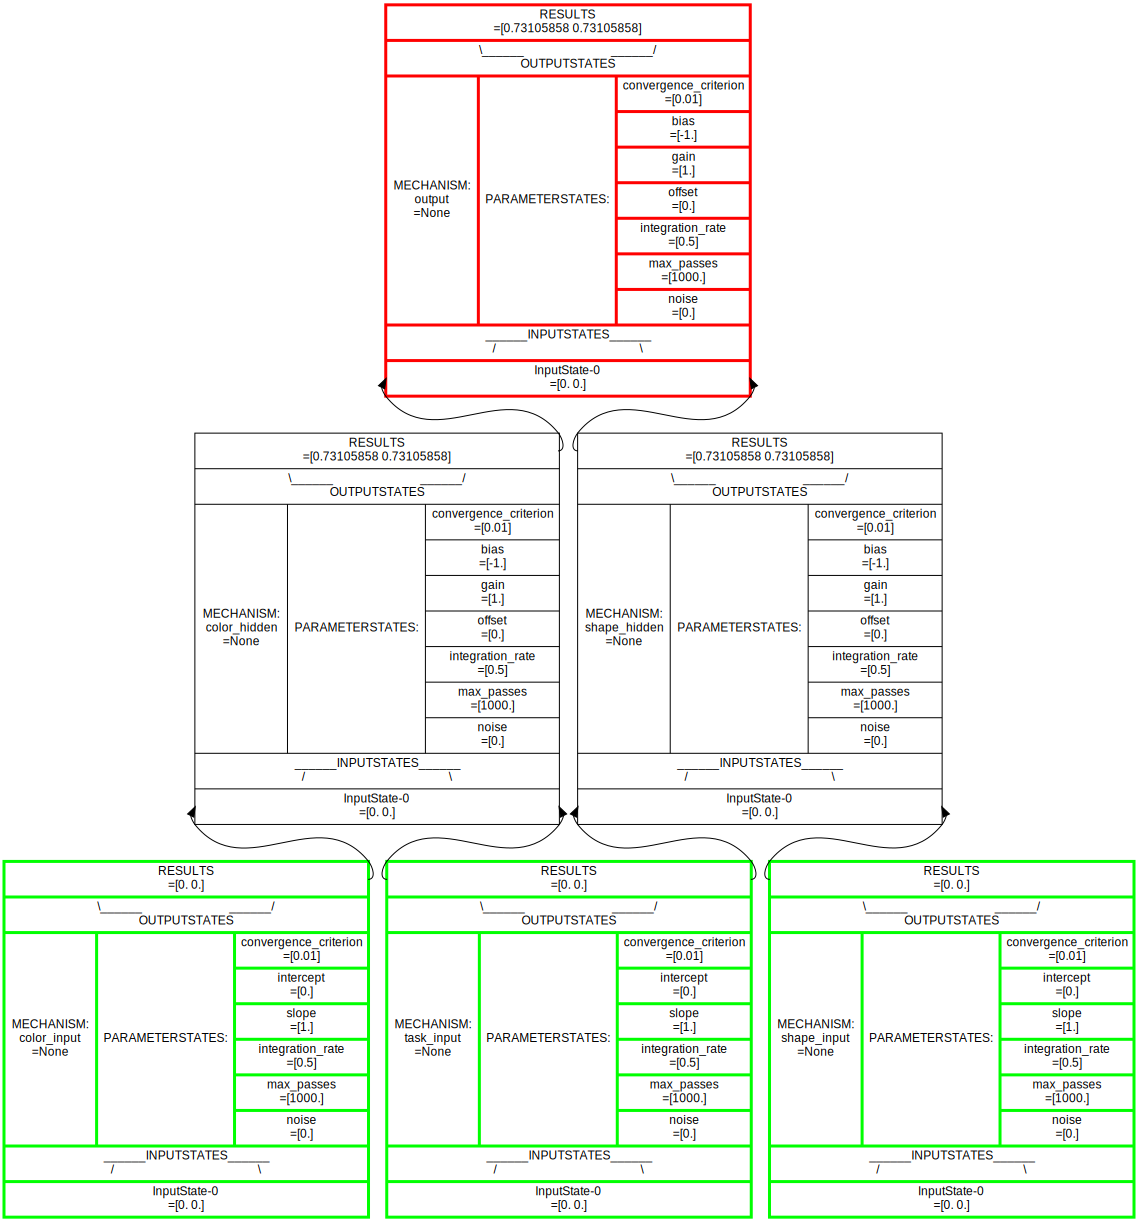

In [35]:
model.system.show_graph(show_mechanism_structure=pnl.VALUES, output_fmt = 'jupyter')